# Plot Shapes

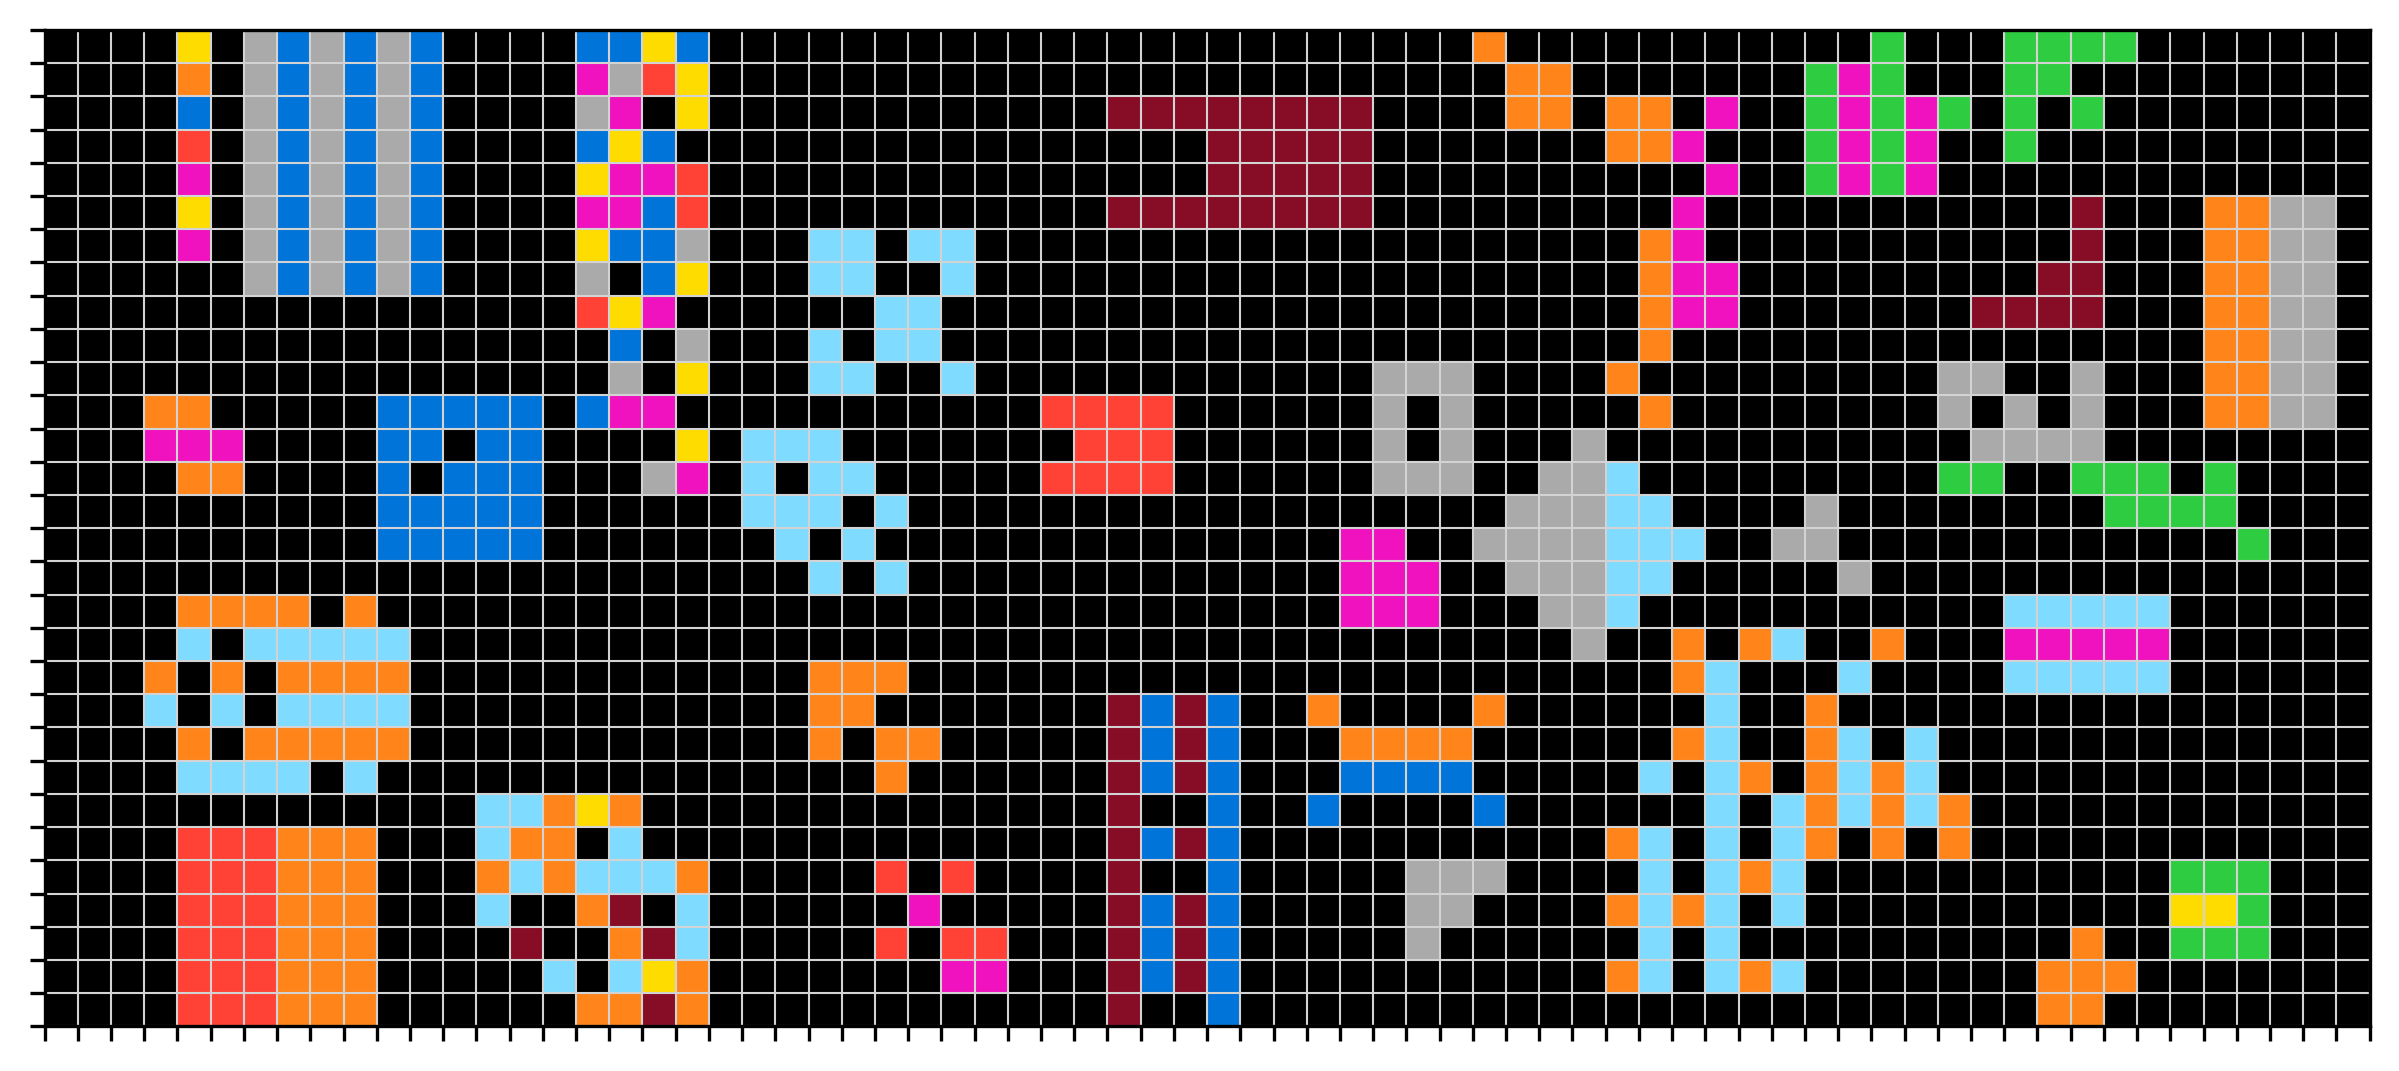

In [1]:
%load_ext autoreload
%autoreload 2
import generator
import time
import sys 
from arcworld.general_utils import plot_task, plot_grid, randomly_add_shape_to_world
import numpy as np

config_small = {
    "min_n_shapes_per_grid": 1,
    "max_n_shapes_per_grid": 8,
    "n_examples": 8,
    "min_grid_size": 20,
    "max_grid_size": 60,
    "allowed_combinations": [["translate_up"]],
    "allowed_transformations": None,
    "min_transformation_depth": None,
    "max_transformation_depth": None,
    "shape_compulsory_conditionals": ["is_shape_fully_connected", 
                                      "is_shape_less_than_6_rows", 
                                      "is_shape_less_than_6_cols", 
                                      "is_shape_simple"]
                                    
}

config_large = {
    "min_n_shapes_per_grid": 1,
    "max_n_shapes_per_grid": 8,
    "n_examples": 8,
    "min_grid_size": 20,
    "max_grid_size": 60,
    "allowed_combinations": [["translate_up"]],
    "allowed_transformations": None,
    "min_transformation_depth": None,
    "max_transformation_depth": None,
    "shape_compulsory_conditionals": ["is_shape_fully_connected", 
                                      "is_shape_more_than_6_cell"]
                                    
}

gen_large = generator.generator(config_large, debug_mode=True)
compatible_shape_rows_large = gen_large.get_compatible_shape_rows(
                shape_conditionals_to_satisfy=gen_large.config.shape_compulsory_conditionals,
                shape_conditionals_not_to_satisfy=[]
            )

gen_small = generator.generator(config_small, debug_mode=True)
compatible_shape_rows_small = gen_small.get_compatible_shape_rows(
                shape_conditionals_to_satisfy=gen_small.config.shape_compulsory_conditionals,
                shape_conditionals_not_to_satisfy=[]
            )


n_shapes = 15
shapes_to_position_large = gen_large.randomly_sample_shapes(compatible_shape_rows = compatible_shape_rows_large,
                                    n_shapes_wanted = 25)

shapes_to_position_small = gen_small.randomly_sample_shapes(compatible_shape_rows = compatible_shape_rows_small,
                                    n_shapes_wanted = 12)


grid = np.zeros((30,70))
for ss in [shapes_to_position_small, shapes_to_position_large]:
    for s in ss:
        try:
            grid, positionned_s = randomly_add_shape_to_world(grid, s)
        except:
            continue

plot_grid(grid, size = (10,10), save_path = "shapes_plot_1.png")

# Plot Tasks

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


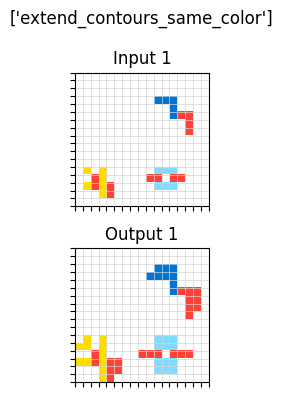

In [265]:
# At each run, the generator will create a new task with a different combination of transformations, as described in the config file.
%load_ext autoreload
%autoreload 2
import generator
import time
import sys 
from arcworld.general_utils import plot_task, plot_grid, randomly_add_shape_to_world
import numpy as np

config = {
    "min_n_shapes_per_grid": 3,
    "max_n_shapes_per_grid": 3,
    "n_examples": 1,
    "min_grid_size": 17,
    "max_grid_size": 17,
    "allowed_combinations": [["extend_contours_same_color"]],
    "allowed_transformations": None,
    "min_transformation_depth": None,
    "max_transformation_depth": None,
    "shape_compulsory_conditionals": ["is_shape_less_than_11_rows", 
                                      "is_shape_less_than_11_cols",
                                      "is_shape_fully_connected",],
}

gen = generator.generator(config, debug_mode=False) # Initialize the generator with the config
task = gen.generate_single_task() # Generate a single task
plot_task(task, size = (4,4))

In [ ]:
# find all unique numbers in the grid
inp = task["pairs"][0]["input"]
def find_unique_numbers(grid):
    unique_numbers = set()
    for row in grid:
        for num in row:
            if num != 0:  # Assuming 0 is not a valid number
                unique_numbers.add(num)
    return unique_numbers
# Example usage
unique_numbers = find_unique_numbers(task["pairs"][0]["input"])
print("Unique numbers in the grid:", unique_numbers)

# COLORMAP = colors.ListedColormap(
    ['#FFFFFF', 
     '#0074D9',
     '#FF4136',
     '#2ECC40',
     '#FFDC00',
    '#AAAAAA', 
    '#F012BE', 
    '#FF851B', 
    '#7FDBFF', 
    '#870C25'])

Unique numbers in the grid: {np.float64(8.0), np.float64(1.0), np.float64(3.0), np.float64(6.0)}


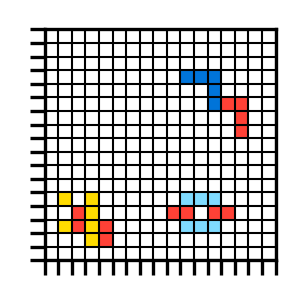

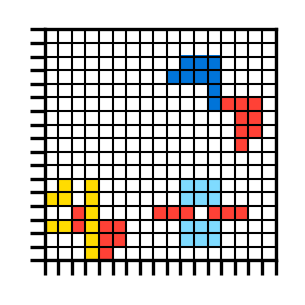

In [266]:
plot_grid(task["pairs"][0]["input"], size = (1,1))
plot_grid(task["pairs"][0]["output"] , size = (1,1))
# # task["pairs"][0]["output"] = np.where(task["pairs"][0]["output"] == 3, 5, task["pairs"][0]["output"])
# task["pairs"][0]["input"] = np.where(task["pairs"][0]["input"] == 3, 5, task["pairs"][0]["input"])

# plot_grid(task["pairs"][0]["input"] , size = (1,1))

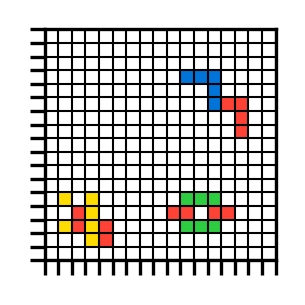

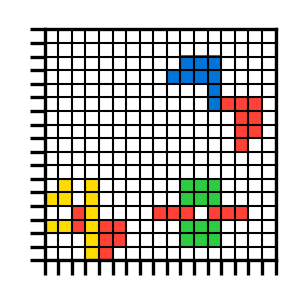

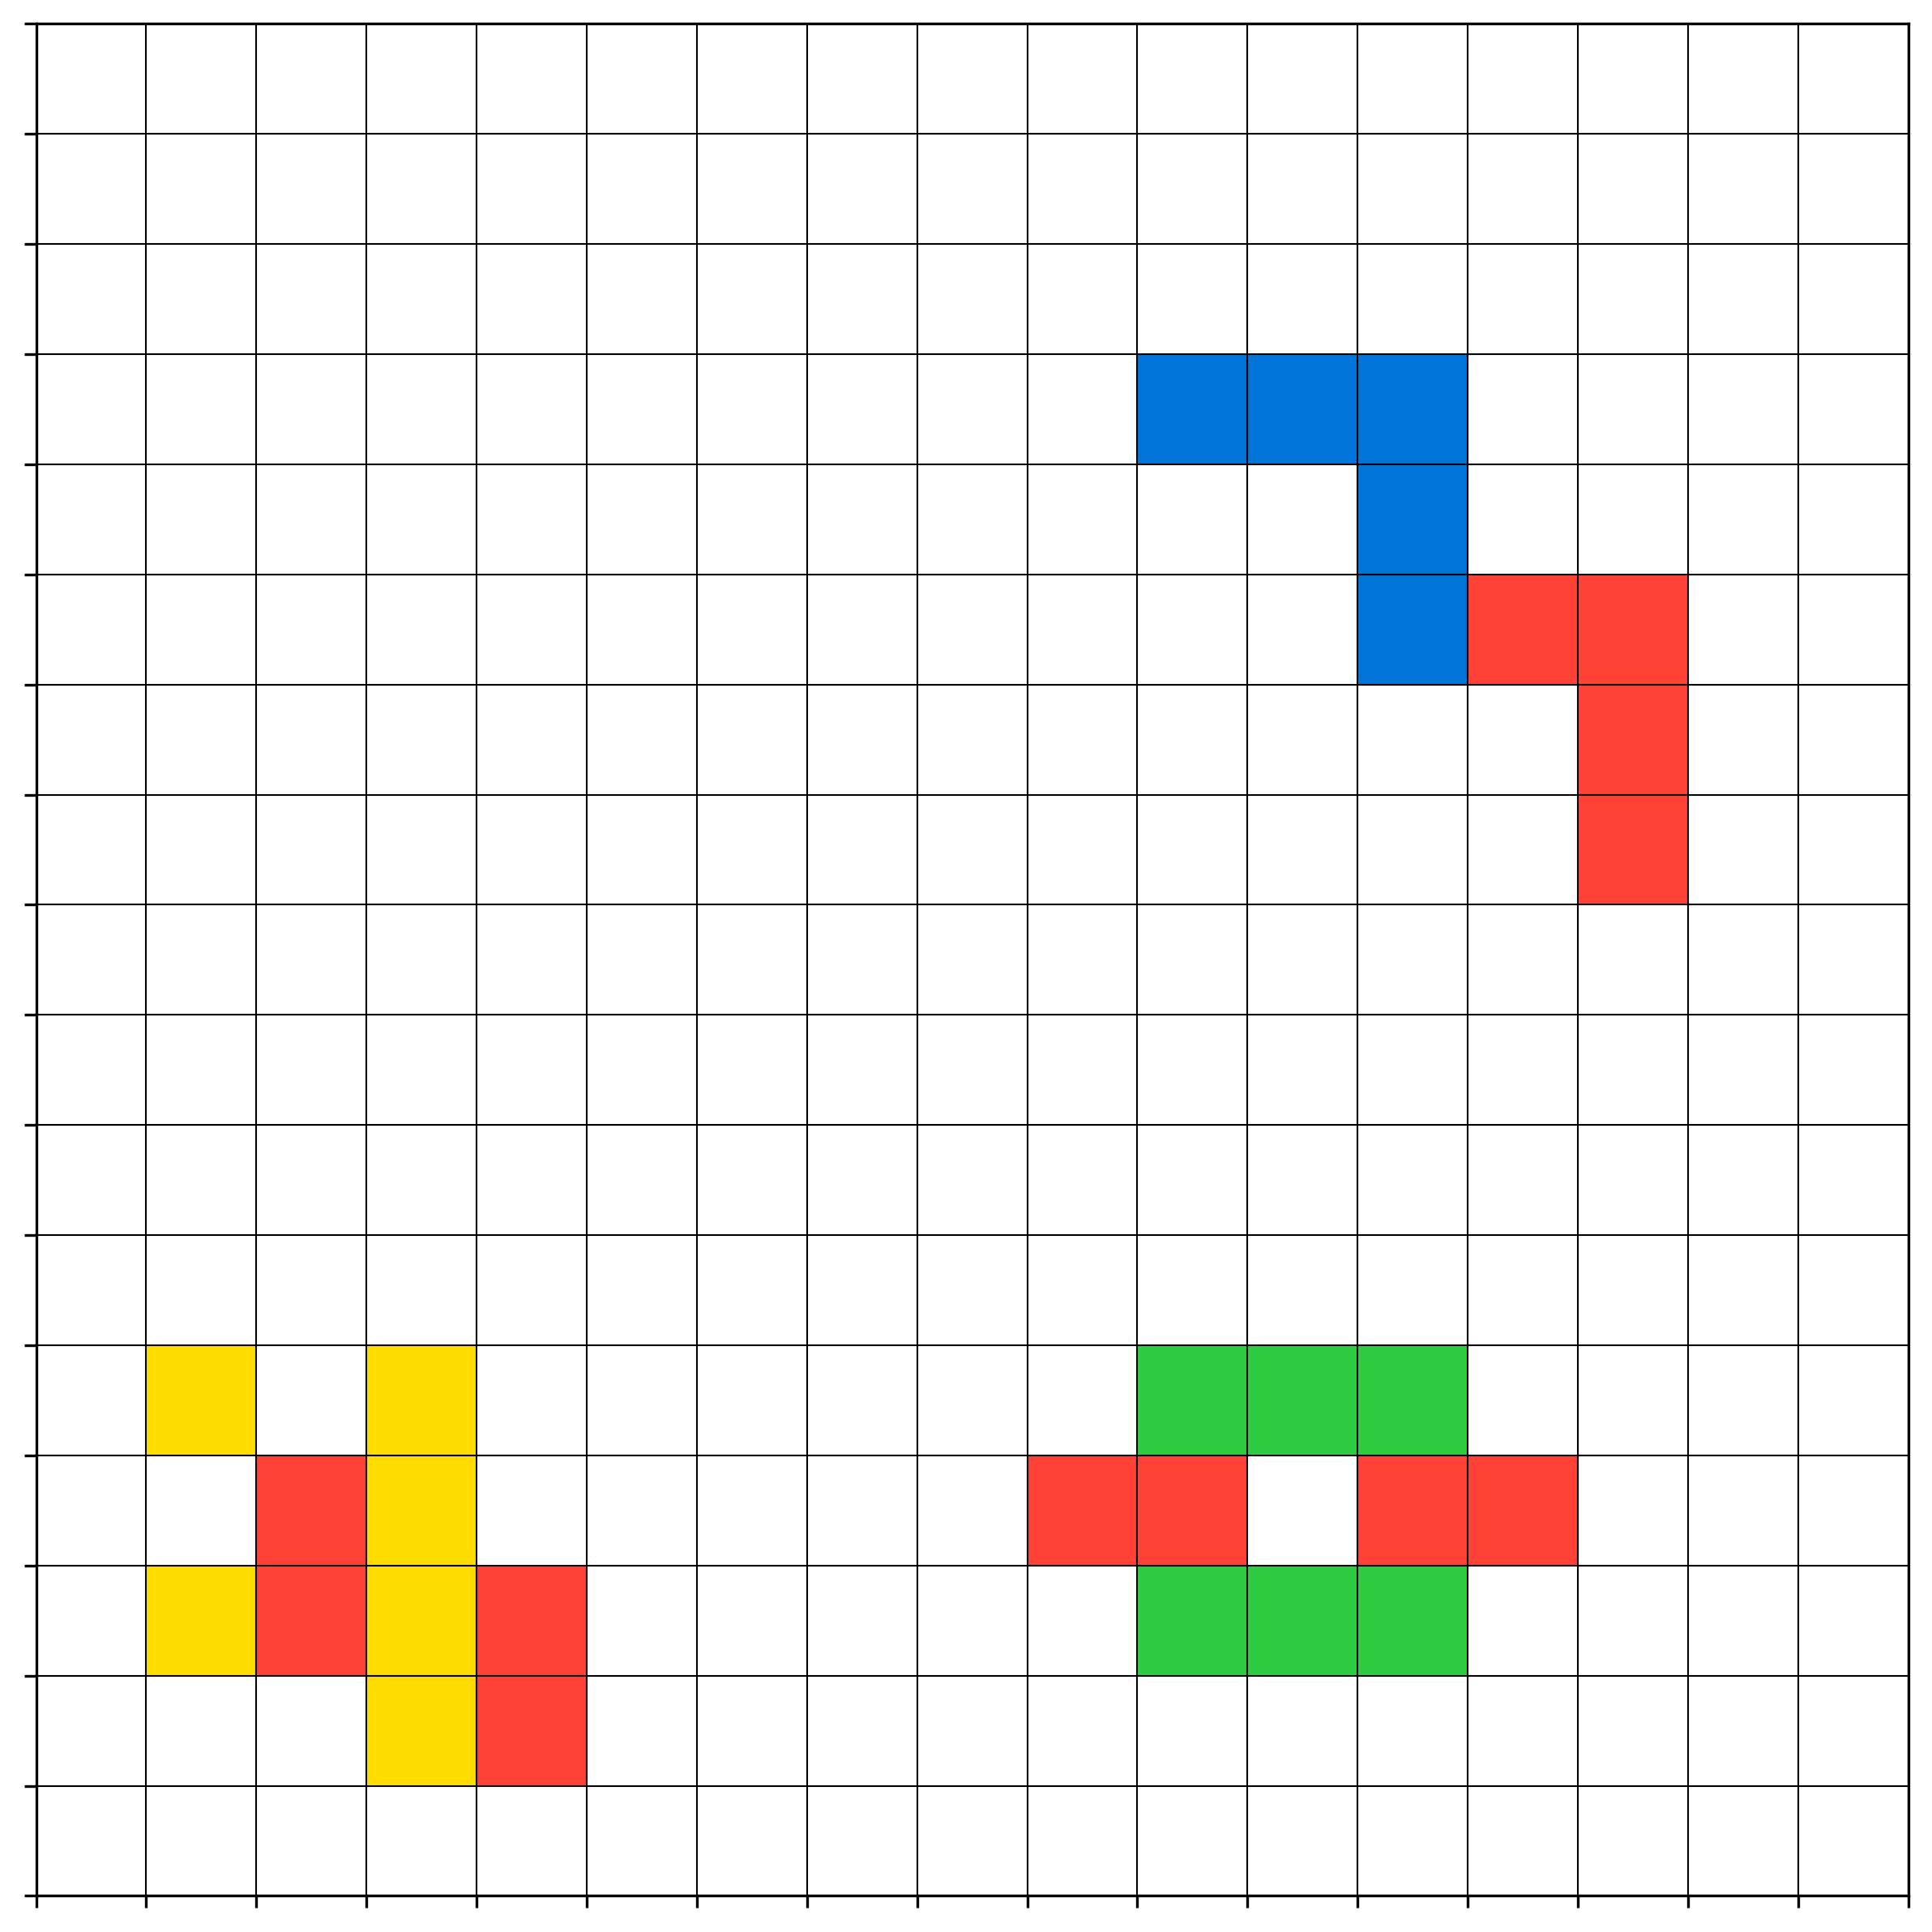

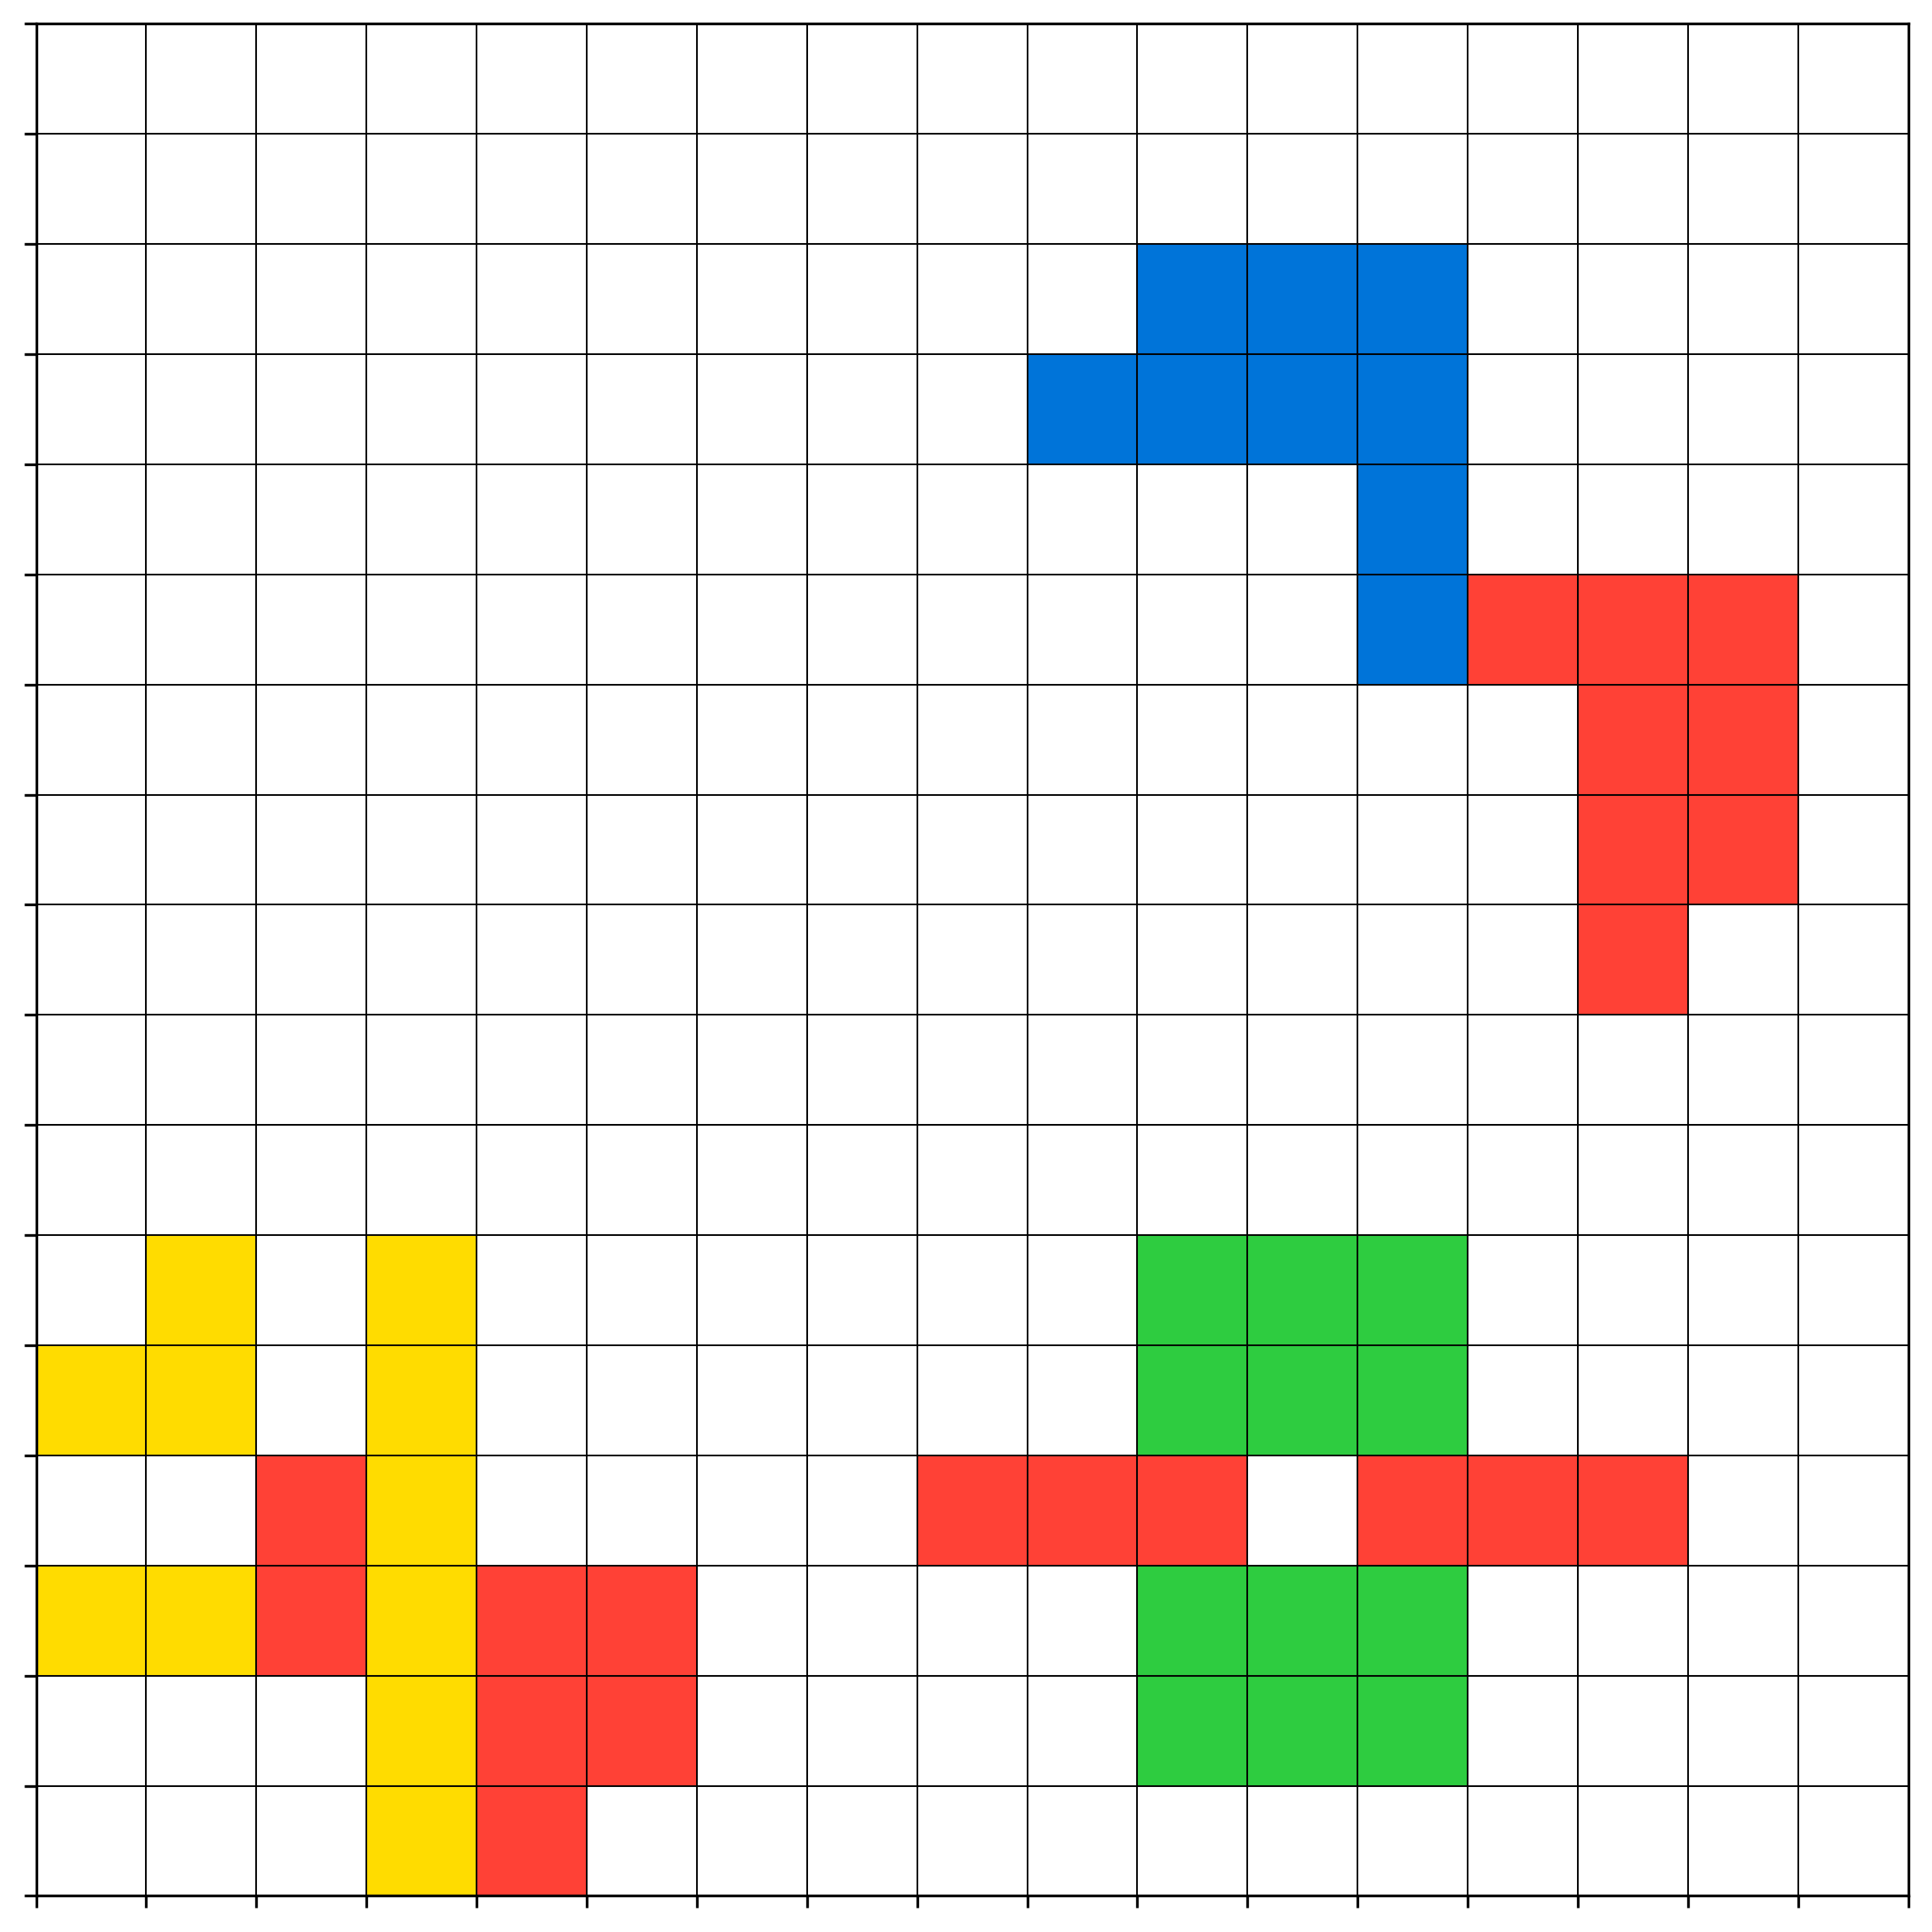

In [268]:
#0 -- FFFFFF – White
#1 -- 0074D9 – Blue
#2 -- FF4136 – Red
#3 -- 2ECC40 – Green
#4 -- FFDC00 – Yellow
#5 -- AAAAAA – Gray
#6 -- F012BE – Fuchsia / Hot Pink
#7 -- FF851B – Orange
#8 -- 7FDBFF – Light Blue / Sky Blue
#9 -- 870C25 – Maroon / Dark Red

# inp = copy.deepcopy(task["pairs"][0]["input"])
# out = copy.deepcopy(task["pairs"][0]["output"])

# inp = np.where(inp == 8, 3, inp)
# out = np.where(out == 8, 3, out)

plot_grid(inp, size = (1,1))
plot_grid(out, size = (1,1))

plot_grid(inp, size = (10,10), save_path = "sec_3_input_1.png")
plot_grid(out, size = (10,10), save_path = "sec_3_output_1.png")

# Count Elapsed Time

In [4]:
# At each run, the generator will create a new task with a different combination of transformations, as described in the config file.

config = {
    "min_n_shapes_per_grid": 4,
    "max_n_shapes_per_grid": 4,
    "n_examples": 1,
    "min_grid_size": 20,
    "max_grid_size": 20,
    "allowed_combinations": None,
    "allowed_transformations": ["crop_top_side", "translate_up", "translate_left", "mirror_horizontal", "rot90"],
    "min_transformation_depth": 2,
    "max_transformation_depth": 2,
    "shape_compulsory_conditionals": ["is_shape_less_than_6_rows", 
                                      "is_shape_less_than_6_cols"],
}

gen = generator.generator(config, debug_mode=False) # Initialize the generator with the config


times = []
for i in range(1000):
    start = time.time()
    task = gen.generate_single_task() # Generate a single task
    end = time.time()
    times.append(end - start)

print("Average time to generate a task: ", np.mean(times))
print("Max time to generate a task: ", np.max(times))
print("Min time to generate a task: ", np.min(times))
print("Std time to generate a task: ", np.std(times))

Average time to generate a task:  0.005396685361862183
Max time to generate a task:  0.02621173858642578
Min time to generate a task:  0.0035791397094726562
Std time to generate a task:  0.002738526547583773
